<a href="https://colab.research.google.com/github/hadwin-357/ML_models/blob/main/Copy_of_Tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Tree, using Gini impurity, entroy, chi

In [ ]:
import pandas as pd
df =pd.read_csv('./data/possum.csv')
df.sample(10,random_state=42)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
30,31,1,Vic,m,3.0,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0
65,66,5,other,f,3.0,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0
64,65,5,other,f,5.0,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5
53,54,4,other,m,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0
93,94,7,other,m,7.0,91.8,57.6,84.0,35.5,64.2,45.1,14.4,29.0,35.0
91,92,7,other,m,2.0,90.7,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0
47,48,3,other,m,5.0,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
10,11,1,Vic,f,9.0,93.3,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


In [ ]:
#data clean up
df=df.dropna()
X=df.drop(['case', 'site', 'Pop', 'sex'],axis=1)
y=df['sex']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_1=DecisionTreeClassifier(criterion='gini',max_features='sqrt')
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred =model_1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'accuracy:{acc}')
con = confusion_matrix(y_test, y_pred)
print(con)

accuracy:0.5161290322580645
[[7 6]
 [9 9]]


In [ ]:
model_2=DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
model_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [ ]:
y_pred =model_2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'accuracy:{acc}')
con = confusion_matrix(y_test, y_pred)
print(con)

accuracy:0.5806451612903226
[[ 7  6]
 [ 7 11]]


[Text(0.42105263157894735, 0.9666666666666667, 'eye <= 14.05\nentropy = 0.979\nsamples = 70\nvalue = [29, 41]'),
 Text(0.2631578947368421, 0.9, 'chest <= 23.5\nentropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.21052631578947367, 0.8333333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3157894736842105, 0.8333333333333334, 'hdlngth <= 94.15\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2631578947368421, 0.7666666666666667, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3684210526315789, 0.7666666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5789473684210527, 0.9, 'footlgth <= 75.2\nentropy = 0.924\nsamples = 59\nvalue = [20, 39]'),
 Text(0.5263157894736842, 0.8333333333333334, 'hdlngth <= 97.25\nentropy = 0.886\nsamples = 56\nvalue = [17, 39]'),
 Text(0.47368421052631576, 0.7666666666666667, 'footlgth <= 62.95\nentropy = 0.931\nsamples = 49\nvalue = [17, 32]'),
 Text(0.42105263157894735, 0.7, 'entropy = 0.0\nsamples = 5\nv

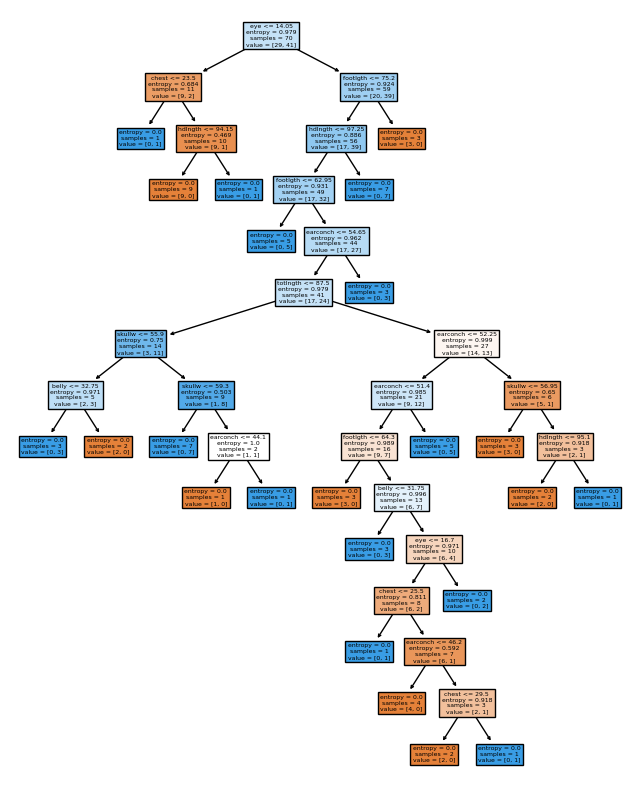

In [ ]:
#visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plot_tree(model_2, feature_names=X.columns, filled=True)

In [ ]:
#feature selelction
model_2.feature_importances_

array([0.        , 0.16647879, 0.0698426 , 0.03891552, 0.        ,
       0.16165616, 0.18761508, 0.1415425 , 0.11586655, 0.11808282])